<a href="https://colab.research.google.com/github/sushmitha27kadam/Movie-Recommender-System/blob/main/movie_recommendation_system_using_tfidfvectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this machine learning project, we built a recommendation system from the ground up to suggest movies to the user based on his/her preferences.**

# **What is a Recommendation System?**
Recommendation systems are computer programs that suggest recommendations to users depending on a variety of criteria.


These systems estimate the most likely product that consumers will buy and that they will be interested in. Netflix, Amazon, and other companies use recommender systems to help their users find the right product or movie for them.


**There are 3 types of recommendation systems.**

**Demographic Filtering:** The recommendations are the same for every user. They are generalized, not personalized. These types of systems are behind sections like “Top Trending”.

**Content-based Filtering:** These suggest recommendations based on the item metadata (movie, product, song, etc). Here, the main idea is if a user likes an item, then the user will also like items similar to it.

**Collaboration-based Filtering:** These systems make recommendations by grouping the users with similar interests. For this system, metadata of the item is not required.






































## Content-based Recommendation System
Content-based filtering is a widely used technique in recommendation systems. In this approach, the system leverages the features and preferences you've provided to suggest items that align with your interests. It draws upon the data you've shared online and any information it can gather to offer personalized recommendations.

The fundamental idea behind content-based filtering is to categorize products using specific keywords, learn about your preferences, search for those terms in its database, and then propose similar items. This type of recommender system heavily relies on user inputs. Examples of platforms using content-based filtering include Google and Wikipedia.

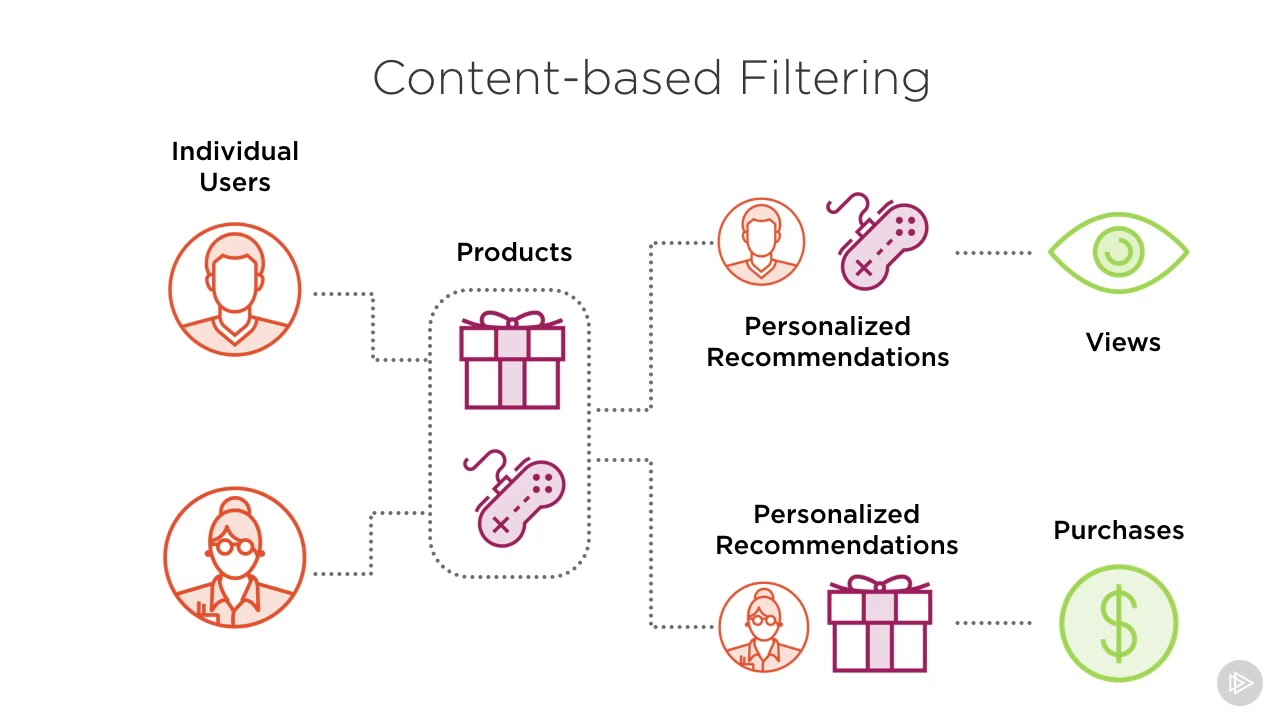


Example

Let's say I'm a fan of the Harry Potter series and mainly watch fantasy movies online. When my data is collected from sources like Google or Wikipedia, it becomes evident that I have a preference for fantasy films. Consequently, my recommendations will be filled with fantasy movies. From the entire pool of movies, the system will curate and recommend the ones that best match my preferences.

For instance, if there are two movies available for recommendation – "Fantastic Beasts" and "Shawshank Redemption" – based on my love for fantasy movies, "Fantastic Beasts" will be recommended to me.

How Does It Work?



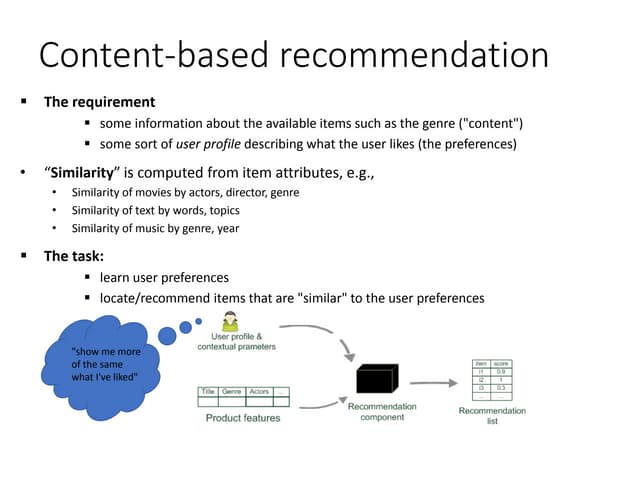


The Vector Space Method

Imagine you've read an Agatha Christie crime thriller book and posted a review online. Additionally, you've reviewed another book in the comedy genre, rating the crime thriller highly and the comedy book poorly.

This information is used to create a rating system. In this system, genres like crime thriller and detective stories receive a high rating (e.g., 9), while other serious genres have ratings from 9 down to 0, and comedy genres are rated lower, possibly in negative values.

Using this rating system, the next book recommendations you receive will likely be in the crime thriller genre because it's your highest-rated genre. A user vector is established to quantify your preferences. Simultaneously, an item vector is constructed to rank books based on their genres.

Each book is assigned a value by calculating the dot product of your user vector and the item vector. These values are then used for making recommendations.

This approach ranks all the books you've searched for by computing the dot products and presents the top 5 or 10 books as suggestions.

The vector space method was among the initial techniques used in content-based recommendation systems for suggesting items to users.

In this project, we are building a Content-based recommendation system for movies.

** The approach to build the movie recommendation engine consists of the following steps.**

>**Perform Exploratory Data Analysis (EDA) on the data**

>**Build the recommendation system**

>**Get recommendations**

# **Step 1: Perform Exploratory Data Analysis (EDA) on the data**
The dataset contains all the metadata information about the movie like id, belongs_to_collection, budget, genres, homepage, imdb_id, original_language original_title, overview, popularity...etc

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #datasetlink: https://drive.google.com/file/d/142ixAWUKLeMjESbEsXzpKvzsRvYvaBWL/view?usp=sharing

Let’s load the movie dataset using pandas.

In [ ]:
# Load the dataset
movie_df = pd.read_csv('/content/drive/MyDrive/data imdb/imdb_data.csv')

In [ ]:
# Print the first 5 rows of the dataframe.
movie_df.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
movie_df.shape
print(f'No of rows:', movie_df.shape[0])
print(f'No of columns:', movie_df.shape[1])

No of rows: 3000
No of columns: 23


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

We only need the imdb_id, title,overview, genres, Keywords, cast, and crew columns of the dataframe

In [ ]:
movies_data = movie_df[['imdb_id','title','overview','genres','Keywords','cast','crew']]

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

Our new dataframe would be:

In [ ]:
movies_data

,imdb_id,title,overview,genres,Keywords,cast,crew
0,tt2637294,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,tt0368933,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,tt2582802,Whiplash,"Under the direction of a ruthless instructor, ...","[{'id': 18, 'name': 'Drama'}]","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,tt1821480,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,tt1380152,Marine Boy,Marine Boy is the story of a former national s...,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."
5,tt0093743,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...","[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de..."
6,tt0431021,The Possession,A young girl buys an antique box at a yard sal...,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de..."
7,tt0391024,Control Room,A chronicle which provides a rare window into ...,"[{'id': 99, 'name': 'Documentary'}]","[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de..."
8,tt0117110,Muppet Treasure Island,After telling the story of Flint's last journe...,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de..."
9,tt0310281,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...","[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de..."


In [ ]:
movies_data.isnull().sum()

imdb_id       0
title         0
overview      8
genres        7
Keywords    276
cast         13
crew         16
dtype: int64

In [ ]:
#For removing rows with NaN values:
movies_data.dropna(axis=0, how='any', inplace=True)

<ipython-input-10-c7f6ca0232a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data.dropna(axis=0, how='any', inplace=True)


In [ ]:
movies_data.dropna(inplace=True)

<ipython-input-11-c2ebfc670e68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data.dropna(inplace=True)


In [ ]:
# Count the number of duplicate rows in the DataFrame
print(f'No of duplicate rows in the df:', movies_data.duplicated().sum())

No of duplicate rows in the df: 0


# **Step 2: Build the Movie Recommender System**

The accuracy of predictions made by the recommendation system can be personalized using the description of the movie.

Let’s say the query to our movie recommendation system  is “The Dark Knight Rises”. Then the predictions should also include movies directed by the director of the film. It should also include movies with the cast of the given query movie.


For that, we utilize the following features to personalize the recommendation: cast, crew, keywords, genres.

The movie data is present in the form of lists containing strings, we need to convert the data into a safe and usable structure.

 Let’s apply the literal_eval() function to the features.

In [ ]:
import ast

In [ ]:
features = ["cast", "crew", "Keywords", "genres"]


for feature in features:
    movies_data[feature] =  movies_data[feature].fillna('[]').apply(ast.literal_eval)

movies_data[features].head(10)


<ipython-input-14-5a4ad4da2068>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data[feature] =  movies_data[feature].fillna('[]').apply(ast.literal_eval)


,cast,crew,Keywords,genres
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 35, 'name': 'Comedy'}]"
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'id': 18, 'name': 'Drama'}]"
3,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
7,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...","[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'id': 99, 'name': 'Documentary'}]"
8,"[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...","[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
9,"[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...","[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '..."
10,"[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...","[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'id': 18, 'name': 'Drama'}]"
11,"[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...","[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'id': 35, 'name': 'Comedy'}]"
12,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...","[{'id': 255, 'name': 'male nudity'}, {'id': 29...","[{'id': 18, 'name': 'Drama'}]"


Let’s write some functions to extract information like director from the above features.

The get_director() function extracts the name of the director of the movie.

In [ ]:
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

The get_list() returns the top 3 elements.

In [ ]:
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

Let’s apply both the functions get_director() and get_list() to our dataset.

In [ ]:
movies_data["director"] = movies_data["crew"].apply(get_director)

features = ["cast", "Keywords", "genres"]
for feature in features:
    movies_data[feature] = movies_data[feature].apply(get_list)

<ipython-input-17-595df720d0f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data["director"] = movies_data["crew"].apply(get_director)
<ipython-input-17-595df720d0f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data[feature] = movies_data[feature].apply(get_list)


In the above code, we passed the “crew” information to the get_director() function, extracted the name, and created a new column “director”.

For the features cast, keyword and genres we extracted the top information by applying the get_list() function

Let’s see how the data looks like after the above transformations.

In [ ]:
movies_data[['title', 'cast', 'director', 'Keywords', 'genres']].head()

,title,cast,director,Keywords,genres
0,Hot Tub Time Machine 2,"[Rob Corddry, Craig Robinson, Clark Duke]",Steve Pink,"[time travel, sequel, hot tub]",[Comedy]
1,The Princess Diaries 2: Royal Engagement,"[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",Garry Marshall,"[coronation, duty, marriage]","[Comedy, Drama, Family]"
2,Whiplash,"[Miles Teller, J.K. Simmons, Melissa Benoist]",Damien Chazelle,"[jazz, obsession, conservatory]",[Drama]
3,Kahaani,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",Sujoy Ghosh,"[mystery, bollywood, police corruption]","[Thriller, Drama]"
7,Control Room,"[Samir Khader, Josh Rushing, George W. Bush]",Jehane Noujaim,"[journalism, translation, television]",[Documentary]


The next step would be to convert the above feature instances into lowercase and remove all the spaces between them.

In [ ]:
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""

features = ['cast', 'Keywords', 'director', 'genres']
for feature in features:
    movies_data[feature] = movies_data[feature].apply(clean_data)

<ipython-input-19-844045279830>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data[feature] = movies_data[feature].apply(clean_data)


Now, let’s create a content_info containing all of the metadata information extracted to input into the vectorizer.

In [ ]:
def content_info(features):
    return ' '.join(features['Keywords']) + ' ' + ' '.join(features['cast']) + ' ' + features['director'] + ' ' + ' '.join(features['genres'])


movies_data["content_info"] = movies_data.apply(content_info, axis=1)
print(movies_data["content_info"].head())

0    timetravel sequel hottub robcorddry craigrobin...
1    coronation duty marriage annehathaway julieand...
2    jazz obsession conservatory milesteller j.k.si...
3    mystery bollywood policecorruption vidyabalan ...
7    journalism translation television samirkhader ...
Name: content_info, dtype: object


<ipython-input-20-8dd83cc7b0bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data["content_info"] = movies_data.apply(content_info, axis=1)


Our movie recommendation system operates by suggesting movies to users based on metadata information. The similarity between the movies is calculated and then used to make recommendations. For that, our text data should be preprocessed and converted into a vectorizer using TfidfVectorizer . TfidfVectorizer considers the importance of words by weighing them based on their frequency in the document and their rarity across the entire corpus, providing a more nuanced representation of the textual content.

TfidfVectorizer excludes common stopwords like "a," "an," and "the" during the vectorization process to ensure that these frequently occurring words, which may not carry significant meaning, do not influence the results.

Various similarity score functions, including cosine similarity and Pearson correlation coefficient, can be used to measure the likeness between movies. In our system, we employ the cosine similarity score, which is calculated as the dot product of the vectors generated by TfidfVectorizer.

Additionally, we reset the indices of our dataframe to ensure consistency and facilitate further analysis.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'content_info' is the column containing movie content information
movies_data['content_info'] = movies_data['content_info'].fillna('')  # Handling missing values

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_data['content_info'])

print(tfidf_matrix.shape)

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)

movies_data = movies_data.reset_index()

<ipython-input-21-43a5bc848e75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['content_info'] = movies_data['content_info'].fillna('')  # Handling missing values


(2705, 8726)
(2705, 2705)


Create a reverse mapping of movie titles to indices. By this, we can easily find the title of the movie based on the index.


In [ ]:
indices = pd.Series(movies_data.index, index=movies_data['title']).drop_duplicates()

print(indices.head())

title
Hot Tub Time Machine 2                      0
The Princess Diaries 2: Royal Engagement    1
Whiplash                                    2
Kahaani                                     3
Control Room                                4
dtype: int64


**Step 3: Get recommendations for the movies**


The get_recommendations() function takes the title of the movie and the similarity function as input. It follows the below steps to make recommendations.

Get the index of the movie using the title.
Get the list of similarity scores of the movies concerning all the movies.
Enumerate them (create tuples) with the first element being the index and the second element is the cosine similarity score.
Sort the list of tuples in descending order based on the similarity score.
Get the list of the indices of the top 10 movies from the above sorted list. Exclude the first element because it is the title itself.
Map those indices to their respective titles and return the movies list.
Create a function that takes in the movie title and the cosine similarity score as input and outputs the top 10 movies similar to it.

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:11]  # Exclude the movie itself

    movie_indices = [ind[0] for ind in similarity_scores]
    recommended_movies = movies_data['title'].iloc[movie_indices]
    return recommended_movies

print("################ Content Based System #############")
print("Recommendations for Kahaani")
print(get_recommendations("Kahaani"))
print()
print("Recommendations for Avengers")
print(get_recommendations("The Avengers"))

################ Content Based System #############
Recommendations for Kahaani
431     Chandni Chowk To China
1251                 Visaranai
1534          Raman Raghav 2.0
385               The Prestige
2636              The Clearing
1382               High Crimes
82                   Sommersby
307             Kiss the Girls
1613          Personal Shopper
1267                   The Fan
Name: title, dtype: object

Recommendations for Avengers
2499                Avengers: Age of Ultron
1684    Captain America: The Winter Soldier
1371                                 Zodiac
1633                               Margaret
1701                  X-Men: The Last Stand
124                                      X2
1823                Guardians of the Galaxy
572                          Fantastic Four
2507                               Cellular
1973                        The Last Castle
Name: title, dtype: object


#                    **    SUCCESSFULLY COMPLETED THE PROJECT!!**